## Users analysis

#### Contents:

Data preparation:

- Load accidents dataset
- Correctly encode NA's
- Create proper time column
- Map values in columns to meaningful ones
- Change columns names to meaningful ones

EDA:

- Check shapes, NA's
- Univariate analysis - plots etc.

#### Key takeaways:

- There are 1 876 005 users (people), with 839 985 accidents (some accidents had more than 1 person involved)
- Variable "place_in_car" - dunno how to interpret that. Probably not meaningful much
- Lots of NA's in pedestran_alone - probably the same number as people being pedestrians
- number of people in each accidents higly skewed. In 99.9% accidents less than 10 people, but could be as much as 86. Maybe we should remove accidents with more than 10 people (accounting for 0.1% of cases)?
- Imbalance in target variable - only 2% killed and 18% heavy injured.
- Most of the users are drivers, with much less passengers and pedestrians.
- Pedestrians are 2 times more likely to get killed or hospitalized than passengers and drivers.
- 2x more men than women, men also get killed 2 times as often

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

# vehicles = pd.read_csv('data/vehicles.csv', low_memory = False)
# places = pd.read_csv('data/places.csv', low_memory = False)
# users = pd.read_csv('data/users.csv', low_memory = False)

In [3]:
users = pd.read_csv('data/users.csv', low_memory = False, encoding = 'latin-1',
                       dtype= str)

In [4]:
users.dtypes

Num_Acc    object
place      object
catu       object
grav       object
sexe       object
trajet     object
secu       object
locp       object
actp       object
etatp      object
an_nais    object
num_veh    object
dtype: object

In [5]:
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1,1,1,2,0,11,0,0,0,1983,B02
1,201600000001,1,1,3,1,9,21,0,0,0,2001,A01
2,201600000002,1,1,3,1,5,11,0,0,0,1960,A01
3,201600000002,2,2,3,1,0,11,0,0,0,2000,A01
4,201600000002,3,2,3,2,0,11,0,0,0,1962,A01


In [6]:
users.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')

Now I'm mapping values of the columns to meaningful ones

In [7]:
import mappings
# A file with dictionaries containing columns values mappings

"secu" variable is strange - only second character is meaningful. Also, 3 should be nan

In [8]:
users["secu"] = users.secu.apply(lambda x: str(x)[1] if len(str(x)) == 2 else np.nan)
users["secu"] = users["secu"].map(mappings.secu_map)

users["catu"] = users["catu"].map(mappings.catu_map)
users["grav"] = users["grav"].map(mappings.grav_map)
users["sexe"] = users["sexe"].map(mappings.sexe_map)
users["actp"] = users["actp"].map(mappings.actp_map)
users["etatp"] = users["etatp"].map(mappings.etatp_map)

In [9]:
users.head(3)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1,Driver,Unscathed,Female,0,yes,0,not specified or not applicable,NaN,1983,B02
1,201600000001,1,Driver,Hospitalized wounded,Male,9,yes,0,not specified or not applicable,NaN,2001,A01
2,201600000002,1,Driver,Hospitalized wounded,Male,5,yes,0,not specified or not applicable,NaN,1960,A01


Changing columns names for readable in english

In [10]:
users.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')

In [11]:
colnames_map = {
    "Num_Acc": "accident_id",
    "place": "place_in_car",
    "catu": "user_type",
    "grav": "injury_type",
    "sexe": "sex",
    "secu": "equipment_used",
    "actp": "pedestrian_action",
    "etatp": "pedestrian_alone",
    "an_nais": "year_of_birth",
    "num_veh": "vechicle_number"
               }

In [12]:
users = users.rename(colnames_map, axis = 1)

Removing columns meaning of which are not specified

In [13]:
cols_to_drop = ["trajet", "locp"]
users = users.drop(cols_to_drop, axis = 1)

Add user_id 

In [14]:
users = users.reset_index().rename({"index": "user_id"}, axis = 1)

#### EDA

In [15]:
users.head()

,user_id,accident_id,place_in_car,user_type,injury_type,sex,equipment_used,pedestrian_action,pedestrian_alone,year_of_birth,vechicle_number
0,0,201600000001,1,Driver,Unscathed,Female,yes,not specified or not applicable,NaN,1983,B02
1,1,201600000001,1,Driver,Hospitalized wounded,Male,yes,not specified or not applicable,NaN,2001,A01
2,2,201600000002,1,Driver,Hospitalized wounded,Male,yes,not specified or not applicable,NaN,1960,A01
3,3,201600000002,2,Passenger,Hospitalized wounded,Male,yes,not specified or not applicable,NaN,2000,A01
4,4,201600000002,3,Passenger,Hospitalized wounded,Female,yes,not specified or not applicable,NaN,1962,A01


In [16]:
users.shape

(1876005, 11)

In [17]:
users.accident_id.nunique()

839985

There are more people than accidents. Check distribution later

Testing percentage number of NA's

In [18]:
users.isna().sum()/users.shape[0]*100

user_id               0.000000
accident_id           0.000000
place_in_car          5.349986
user_type             0.000000
injury_type           0.000000
sex                   0.000000
equipment_used       21.817532
pedestrian_action     0.094509
pedestrian_alone     92.046610
year_of_birth         0.125319
vechicle_number       0.000000
dtype: float64

#### Check number of people in each accident

In [19]:
a = users[["user_id", "accident_id"]].groupby("accident_id").count().reset_index()

In [20]:
a.describe()

,user_id
count,839985.000000
mean,2.233379
std,1.176360
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,86.000000


Cumulative percentage of people taking part in accidents:

In [21]:
(a.groupby("user_id").count().cumsum()*100/a.user_id.count()).head(10)

,accident_id
user_id,
1,18.187349
2,75.412656
3,90.981506
4,96.077668
5,98.251993
6,99.187605
7,99.586183
8,99.767972
9,99.857855


In most of the accidents number people is <3, but maximum is 86 people. Maybe we should remove accidents with more than 10 people (accounting for 0.1% of cases)? As these could beheavy outliers.

##### Injury type - our dependent variable

Text(0.5, 1.0, 'Injury type')

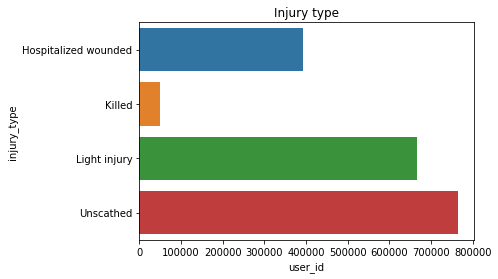

In [22]:
a = users.groupby("injury_type").count().reset_index()
sns.barplot(x = "user_id", y = "injury_type", data = a).set_title("Injury type")

In [23]:
no_users = users.shape[0]
a[["injury_type", "user_id"]].assign(percentage = lambda x: x.user_id/no_users*100)

,injury_type,user_id,percentage
0,Hospitalized wounded,393669,20.984432
1,Killed,50589,2.696635
2,Light injury,666873,35.547507
3,Unscathed,764874,40.771427


An imbalance in dependent variable is present. If we don't bin killed and wounded ones, we get only 2% of cases in one category. Probably we should bin 0,1 and 2,3 together. But still, we get 20%/80% in categories. This will probably be a thing in modeling later on.

#### Type of person

Text(0.5, 1.0, 'user_type')

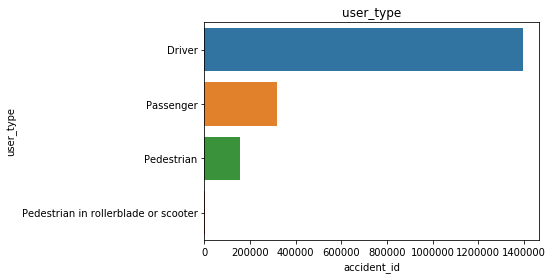

In [24]:
a = users.groupby("user_type").count().reset_index()
sns.barplot(x = "accident_id", y = "user_type", data = a).set_title("user_type")

In [25]:
types_percentages = a[["user_type", "user_id"]].assign(percentage = lambda x: x.user_id/no_users*100)
types_percentages

,user_type,user_id,percentage
0,Driver,1397701,74.504119
1,Passenger,319388,17.024901
2,Pedestrian,155649,8.296833
3,Pedestrian in rollerblade or scooter,3267,0.174147


Most of the users are drivers, with much less passengers and pedestrians.

Text(0.5, 1.0, 'user_type and injury type')

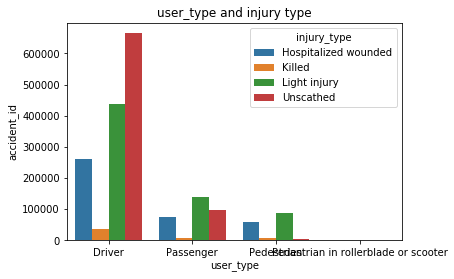

In [26]:
a = users.groupby(["user_type", "injury_type"]).count().reset_index()
sns.barplot(y = "accident_id", x = "user_type", hue = "injury_type", data = a).set_title("user_type and injury type")

Obtaining the same information as in above plot, but using percentages, not absolute values

In [27]:
b = a.iloc[:,:3].set_index("user_type")
types_percentages2 = types_percentages.set_index("user_type").iloc[:,0]#.user_id

joined = b.join(types_percentages2, rsuffix = "_total")
joined2 = joined.reset_index().assign(percentage = lambda x: x.user_id/x.user_id_total*100)
joined2.drop(["user_id", "user_id_total"], axis = 1)

,user_type,injury_type,percentage
0,Driver,Hospitalized wounded,18.624441
1,Driver,Killed,2.513342
2,Driver,Light injury,31.327158
3,Driver,Unscathed,47.535059
4,Passenger,Hospitalized wounded,23.333688
5,Passenger,Killed,2.737736
6,Passenger,Light injury,43.417724
7,Passenger,Unscathed,30.510852
8,Pedestrian,Hospitalized wounded,37.092432
9,Pedestrian,Killed,4.275646


Percentages for Driver and Pasenger are almost the same. However, pedestrians have almost two times the risk of getting hospitalized or killed. This sounds like a good predictor. The problem is that majority of the people in the dataset are the drivers. So this is a valuable predictor but only for 8% of the observations.

Pedestrian in rollerblade category is very rare. Maybe should be treated as the driver in modeling? (as percentages are close to each other)

#### Sex

Text(0.5, 1.0, 'Sex')

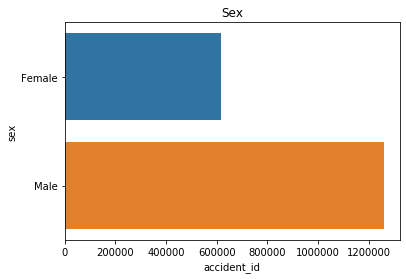

In [28]:
a = users.groupby("sex").count().reset_index()
sns.barplot(x = "accident_id", y = "sex", data = a).set_title("Sex")

In [29]:
types_percentages = a.iloc[:,:2]

Text(0.5, 1.0, 'Sex and injury type')

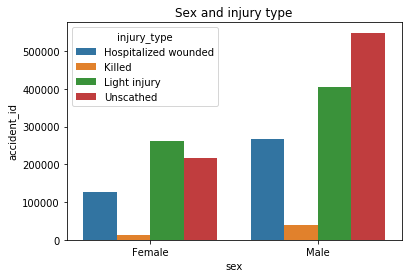

In [30]:
a = users.groupby(["sex", "injury_type"]).count().reset_index()
sns.barplot(y = "accident_id", x = "sex", hue = "injury_type", data = a).set_title("Sex and injury type")

In [31]:
b = a.iloc[:,:3].set_index("sex")
types_percentages2 = types_percentages.set_index("sex").iloc[:,0]#.user_id

joined = b.join(types_percentages2, rsuffix = "_total")
joined2 = joined.reset_index().assign(percentage = lambda x: x.user_id/x.user_id_total*100)
joined2.drop(["user_id", "user_id_total"], axis = 1)

,sex,injury_type,percentage
0,Female,Hospitalized wounded,20.382373
1,Female,Killed,1.962272
2,Female,Light injury,42.631878
3,Female,Unscathed,35.023477
4,Male,Hospitalized wounded,21.279475
5,Male,Killed,3.056514
6,Male,Light injury,32.075764
7,Male,Unscathed,43.588247


Males have 33% more risk of getting killed (2 -> 3%), but the percentage for hospitalization does not differ much

In [32]:
users.to_pickle('data/users_preprocessed.pkl')

# users = read_pickle('data/users_preprocessed.pkl')

### TODO yet

- Add accidents dataframe to the people data, and do bivariate analysis (with our tagret variable)
- Check age variable - but this should be done with date of accident variable, as the dataset spans 10 years
-  Repeat the analysis for vechicles data and places data